# Décima Atividade de Processamento Digital de Sinais - ECAC14A #
## Mateus Alexandre M. de Souza - 2021004023 ##
### Exercício 1 ###
Gerar o sinal em Python com duração de 2s. Este sinal será usado para testar os filtros a serem desenvolvidos.

50.0 | 2.0000
300.0 | 1.0000
500.0 | 2.5000
700.0 | 1.5000


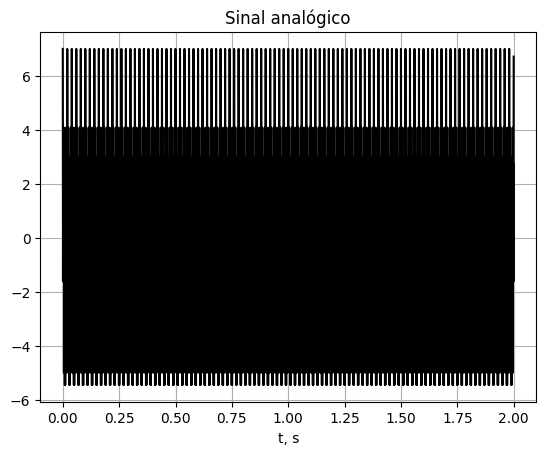

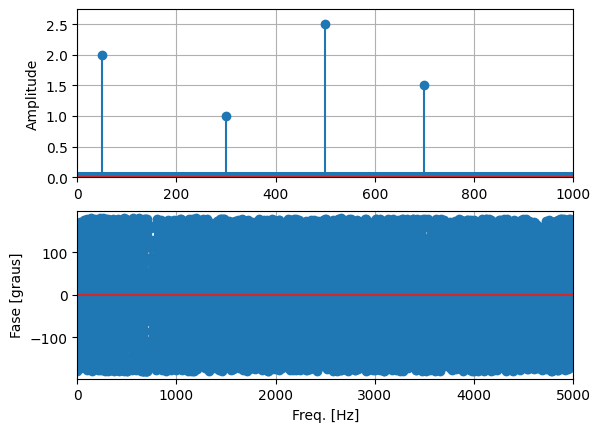

In [1]:
import control as ct
import numpy as np
import matplotlib.pyplot as plt
import espectro
import importlib
importlib.reload(espectro)

fs = 10000
T = 2
ta = np.arange(T*fs)/fs

sa = 2*np.cos(2*np.pi*50*ta) + np.cos(2*np.pi*300*ta) + 2.5*np.cos(2*np.pi*500*ta) + 1.5*np.cos(2*np.pi*700*ta)

plt.figure()
plt.plot(ta,sa,color='k'), plt.grid()
plt.title("Sinal analógico")
plt.xlabel("t, s")


espectro.espectro1D(sa, fs, 2)

### Exercício 2 ###
Projetar um filtro IIR Butterworth (manualmente, <u>usando as equações do filtro</u>) para eliminar todas as componentes (reduzir para menos de 20% de sua amplitude original), exceto a de 300Hz. É desejável que o filtro não afete (tolerância de ± 5%) as amplitudes das componentes que devem permanecer no sinal.

All poles:  [  587.26515977+2191.70341379j  -587.26515977+2191.70341379j
 -1604.43825402+1604.43825402j -2191.70341379 +587.26515977j
 -2191.70341379 -587.26515977j -1604.43825402-1604.43825402j
  -587.26515977-2191.70341379j   587.26515977-2191.70341379j
  1604.43825402-1604.43825402j  2191.70341379 -587.26515977j
  2191.70341379 +587.26515977j  1604.43825402+1604.43825402j]
Stable poles:  [np.complex128(-587.2651597731899+2191.7034137886003j), np.complex128(-1604.43825401541+1604.4382540154104j), np.complex128(-2191.7034137886003+587.2651597731908j), np.complex128(-2191.7034137886008-587.2651597731893j), np.complex128(-1604.438254015411-1604.4382540154093j), np.complex128(-587.265159773192-2191.7034137886j)]
H(s): <TransferFunction>: sys[0]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                                       1.365e+20
----------------------------------------------------------------------------------------
s^6 + 8767 s^5 + 3.843e+07 s^4 + 1.068e+11 s^3 + 1.978e+14 s^2 +

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:461: LinAlgWarning: Ill-conditioned matrix (rcond=3.32701e-32): result may not be accurate.
  ad = linalg.solve(ima, np.eye(a.shape[0]) + (1.0-alpha)*dt*a)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:462: LinAlgWarning: Ill-conditioned matrix (rcond=3.32701e-32): result may not be accurate.
  bd = linalg.solve(ima, dt*b)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:465: LinAlgWarning: Ill-conditioned matrix (rcond=3.3157e-32): result may not be accurate.
  cd = linalg.solve(ima.transpose(), c.transpose())
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\mateu\AppData\Local\Programs\Python\Python

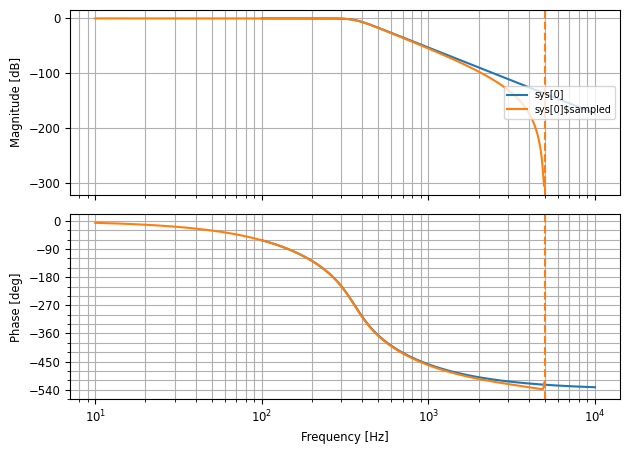

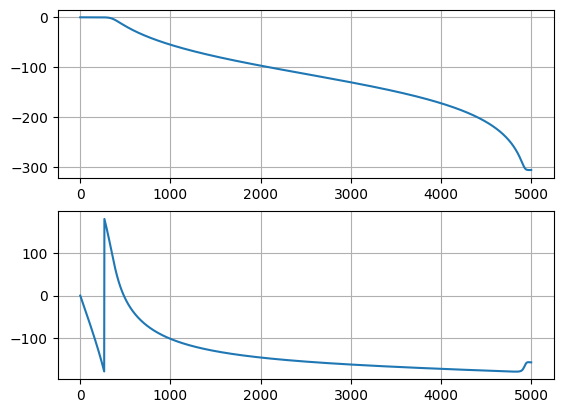

In [2]:
import math
from scipy.signal import freqz

Rs = 0.2
Ws1 = 2*np.pi*50
Ws2 = 2*np.pi*500

Rp = 0.95
Wp1 = 2*np.pi*300
Wp2 = Wp1

#passa-baixa
N = math.log10((1/Rp**2 -1) / (1/Rs**2 -1)) / (2*math.log10(Wp2/Ws2))
N = int(np.ceil(N))

Wc = Wp2 * (1/(1/Rp**2 -1))**(1/(2*N))

k = np.arange(0,2*N)
poles = Wc*np.exp((1j*np.pi/(2*N))*(2*k+N-1))
print('All poles: ',poles)
stPoles = [p for p in poles if np.real(p)<0]
print('Stable poles: ',stPoles)

numS = Wc**N
denS = np.poly(stPoles)
Hpbs = ct.tf(numS,denS)
print('H(s):',Hpbs)

Ts = 1/fs
Hz = ct.c2d(Hpbs, Ts, 'tustin')
print('H(z):',Hz)

ct.bode(Hpbs, dB=True, Hz=True)
ct.bode(Hz, dB=True, Hz=True)


numZ = Hz.num[0][0]
denZ = Hz.den[0][0]
w,h = freqz(numZ,denZ,worN=2000,fs=fs)
fig = plt.figure(3)
fig.clf()
ax0 = fig.add_subplot(211)
ax0.plot(w,20*np.log10(abs(h)))
ax0.grid(True)
ax1 = fig.add_subplot(212)
ax1.plot(w,np.angle(h)*180/np.pi)
ax1.grid(True)
plt.show()

All poles:  [ 764.1444735+764.1444735j -764.1444735+764.1444735j
 -764.1444735-764.1444735j  764.1444735-764.1444735j]
Stable poles:  [np.complex128(-764.1444735044913+764.1444735044914j), np.complex128(-764.1444735044915-764.1444735044913j)]
H(s): <TransferFunction>: sys[4]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


          s^2
------------------------
s^2 + 1528 s + 1.168e+06

H(z): <TransferFunction>: sys[4]$sampled
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


0.9265 z^2 - 1.853 z + 0.9265
-----------------------------
   z^2 - 1.848 z + 0.8584

dt = 0.0001



c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


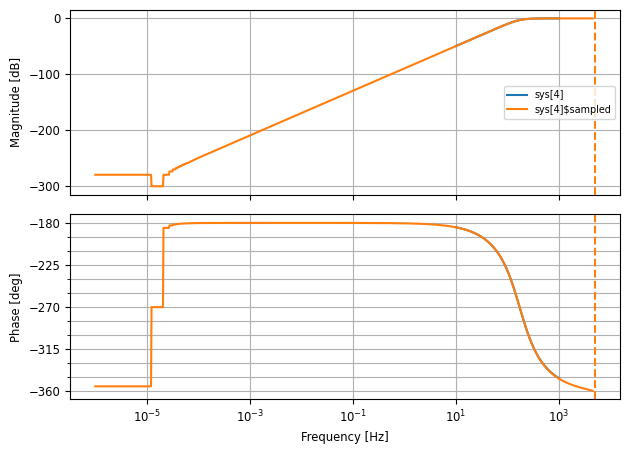

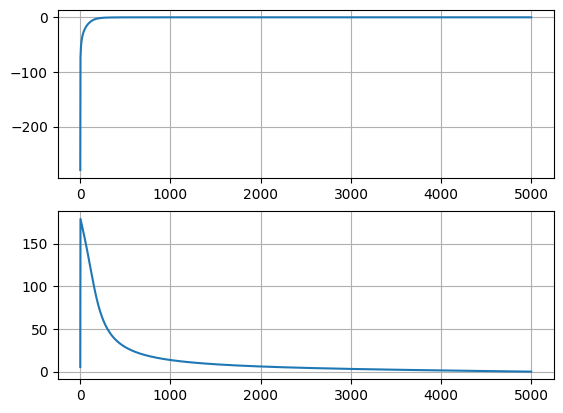

In [3]:
#passa-alta
N = math.log10((1/Rp**2 -1) / (1/Rs**2 -1)) / (2*math.log10(Wp1/Ws1))
N = int(np.sign(N)*np.ceil(abs(N)))

Wc = Wp1 * (1/(1/Rp**2 -1))**(1/(2*N))

N = abs(N)

k = np.arange(0,2*N)
poles = Wc*np.exp((1j*np.pi/(2*N))*(2*k+N-1))
print('All poles: ',poles)
stPoles = [p for p in poles if np.real(p)<0]
print('Stable poles: ',stPoles)

numS = np.append(1,np.zeros(N))
denS = np.poly(stPoles)
Hpas = ct.tf(numS,denS)
print('H(s):',Hpas)

Ts = 1/fs
Hz = ct.c2d(Hpas, Ts, 'tustin')
print('H(z):',Hz)

ct.bode(Hpas, dB=True, Hz=True)
ct.bode(Hz, dB=True, Hz=True)


numZ = Hz.num[0][0]
denZ = Hz.den[0][0]
w,h = freqz(numZ,denZ,worN=2000,fs=fs)
fig = plt.figure(3)
fig.clf()
ax0 = fig.add_subplot(211)
ax0.plot(w,20*np.log10(abs(h)))
ax0.grid(True)
ax1 = fig.add_subplot(212)
ax1.plot(w,np.angle(h)*180/np.pi)
ax1.grid(True)
plt.show()

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


0 states have been removed from the model

Passa-faixa:
Hpfs(s): <TransferFunction>: sys[9]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                                                       1.365e+20 s^2
----------------------------------------------------------------------------------------------------------------------------
s^8 + 1.03e+04 s^7 + 5.299e+07 s^6 + 1.758e+11 s^5 + 4.059e+14 s^4 + 6.595e+17 s^3 + 7.227e+20 s^2 + 4.799e+23 s + 1.594e+26



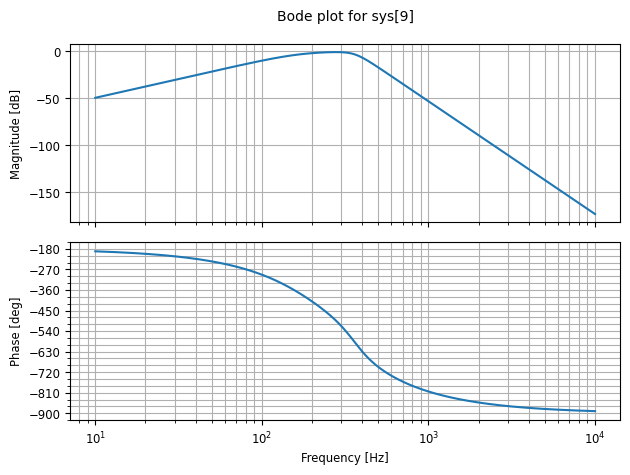

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:461: LinAlgWarning: Ill-conditioned matrix (rcond=2.63298e-44): result may not be accurate.
  ad = linalg.solve(ima, np.eye(a.shape[0]) + (1.0-alpha)*dt*a)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:462: LinAlgWarning: Ill-conditioned matrix (rcond=2.63298e-44): result may not be accurate.
  bd = linalg.solve(ima, dt*b)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:465: LinAlgWarning: Ill-conditioned matrix (rcond=2.61717e-44): result may not be accurate.
  cd = linalg.solve(ima.transpose(), c.transpose())


In [4]:
Hpfs = ct.minreal(Hpas * Hpbs)
print('\nPassa-faixa:')
print('Hpfs(s):', Hpfs)
plt.figure(3)
plt.clf()
ct.bode(Hpfs,dB=True,Hz=True)
plt.show()

Hz = ct.c2d(Hpfs, Ts, 'tustin')

numZ = Hz.num[0][0]
denZ = Hz.den[0][0]


# Exercício 3 #
Fazer uma função Python para implementar o filtro projetado. Esta função deve receber como argumento de entrada somente o sinal a ser filtrado e deve devolver somente o sinal filtrado e não deve conter comandos de construção do filtro. Aplicar esta função no sinal do exercício 1. Forneça o espectro do sinal filtrado que comprova o funcionamento da função de filtragem.

50.0 | 0.1682
300.0 | 0.9004
500.0 | 0.3322
700.0 | 0.0257


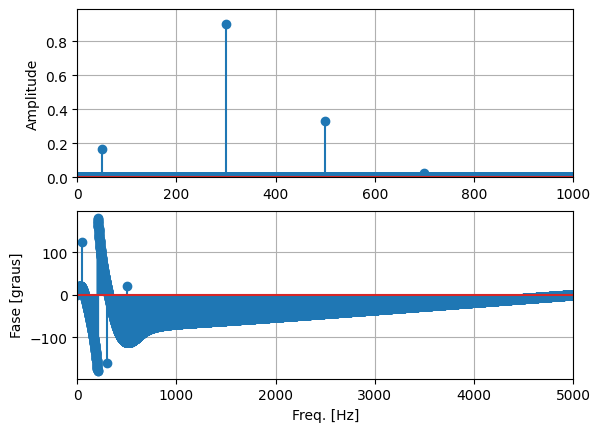

In [5]:
from scipy.signal import lfilter

filtered_signal = lfilter(numZ, denZ, sa)

espectro.espectro1D(filtered_signal, fs, 3)

# Exercício 4 #
Projetar um filtro IIR Butterworth (manualmente, <u>usando as equações do filtro</u>) para eliminar a componente de 500Hz (reduzir para menos de 20% de sua amplitude original). É desejável que o filtro não afete (tolerância de ± 5%) as amplitudes das componentes que devem permanecer no sinal.

All poles:  [  617.3214363 +3.50100384e+03j  -617.3214363 +3.50100384e+03j
 -1777.506233  +3.07873111e+03j -2723.2975448 +2.28511797e+03j
 -3340.61898111+1.21588587e+03j -3555.012466  +4.35363464e-13j
 -3340.61898111-1.21588587e+03j -2723.2975448 -2.28511797e+03j
 -1777.506233  -3.07873111e+03j  -617.3214363 -3.50100384e+03j
   617.3214363 -3.50100384e+03j  1777.506233  -3.07873111e+03j
  2723.2975448 -2.28511797e+03j  3340.61898111-1.21588587e+03j
  3555.012466  -8.70726927e-13j  3340.61898111+1.21588587e+03j
  2723.2975448 +2.28511797e+03j  1777.506233  +3.07873111e+03j]
Stable poles:  [np.complex128(-617.3214363048774+3501.0038385761436j), np.complex128(-1777.50623300218+3078.73110633014j), np.complex128(-2723.2975448013353+2285.1179654287935j), np.complex128(-3340.618981106213+1215.8858731473513j), np.complex128(-3555.012466004361+4.3536346374211797e-13j), np.complex128(-3340.618981106213-1215.8858731473504j), np.complex128(-2723.297544801336-2285.1179654287926j), np.complex128(-17

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:461: LinAlgWarning: Ill-conditioned matrix (rcond=1.34849e-55): result may not be accurate.
  ad = linalg.solve(ima, np.eye(a.shape[0]) + (1.0-alpha)*dt*a)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:462: LinAlgWarning: Ill-conditioned matrix (rcond=1.34849e-55): result may not be accurate.
  bd = linalg.solve(ima, dt*b)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:465: LinAlgWarning: Ill-conditioned matrix (rcond=1.34412e-55): result may not be accurate.
  cd = linalg.solve(ima.transpose(), c.transpose())
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\mateu\AppData\Local\Programs\Python\Pytho

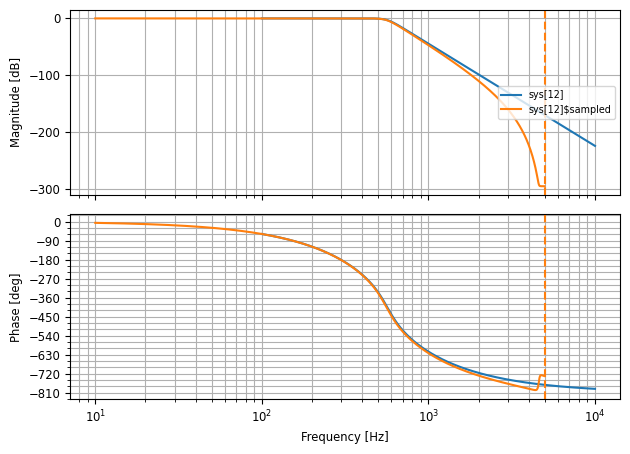

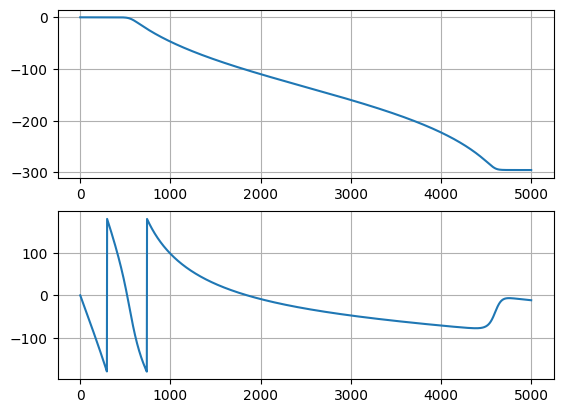

In [6]:
import math
from scipy.signal import freqz

Rs = 0.2
Ws1 = 2*np.pi*300
Ws2 = 2*np.pi*700

Rp = 0.95
Wp1 = 2*np.pi*500
Wp2 = Wp1

#passa-baixa
N = math.log10((1/Rp**2 -1) / (1/Rs**2 -1)) / (2*math.log10(Wp2/Ws2))
N = int(np.ceil(N))

Wc = Wp2 * (1/(1/Rp**2 -1))**(1/(2*N))

k = np.arange(0,2*N)
poles = Wc*np.exp((1j*np.pi/(2*N))*(2*k+N-1))
print('All poles: ',poles)
stPoles = [p for p in poles if np.real(p)<0]
print('Stable poles: ',stPoles)

numS = Wc**N
denS = np.poly(stPoles)
Hpbs = ct.tf(numS,denS)
print('H(s):',Hpbs)

Ts = 1/fs
Hz = ct.c2d(Hpbs, Ts, 'tustin')
print('H(z):',Hz)

ct.bode(Hpbs, dB=True, Hz=True)
ct.bode(Hz, dB=True, Hz=True)


numZ = Hz.num[0][0]
denZ = Hz.den[0][0]
w,h = freqz(numZ,denZ,worN=2000,fs=fs)
fig = plt.figure(3)
fig.clf()
ax0 = fig.add_subplot(211)
ax0.plot(w,20*np.log10(abs(h)))
ax0.grid(True)
ax1 = fig.add_subplot(212)
ax1.plot(w,np.angle(h)*180/np.pi)
ax1.grid(True)
plt.show()

All poles:  [  675.47490726+2520.90667312j  -675.47490726+2520.90667312j
 -1845.43176586+1845.43176586j -2520.90667312 +675.47490726j
 -2520.90667312 -675.47490726j -1845.43176586-1845.43176586j
  -675.47490726-2520.90667312j   675.47490726-2520.90667312j
  1845.43176586-1845.43176586j  2520.90667312 -675.47490726j
  2520.90667312 +675.47490726j  1845.43176586+1845.43176586j]
Stable poles:  [np.complex128(-675.474907256862+2520.906673120486j), np.complex128(-1845.4317658636232+1845.4317658636237j), np.complex128(-2520.9066731204857+675.474907256863j), np.complex128(-2520.906673120486-675.4749072568613j), np.complex128(-1845.4317658636244-1845.4317658636226j), np.complex128(-675.4749072568644-2520.9066731204853j)]
H(s): <TransferFunction>: sys[16]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


                                            s^6
--------------------------------------------------------------------------------------------
s^6 + 1.008e+04 s^5 + 5.084e+07 s^4 + 1.625e+11 s^3 + 3.4

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:461: LinAlgWarning: Ill-conditioned matrix (rcond=6.62512e-33): result may not be accurate.
  ad = linalg.solve(ima, np.eye(a.shape[0]) + (1.0-alpha)*dt*a)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:462: LinAlgWarning: Ill-conditioned matrix (rcond=6.62512e-33): result may not be accurate.
  bd = linalg.solve(ima, dt*b)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:465: LinAlgWarning: Ill-conditioned matrix (rcond=6.60554e-33): result may not be accurate.
  cd = linalg.solve(ima.transpose(), c.transpose())
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\mateu\AppData\Local\Programs\Python\Pytho

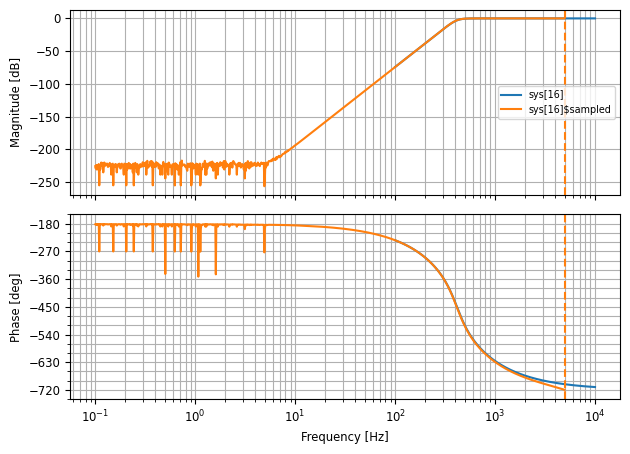

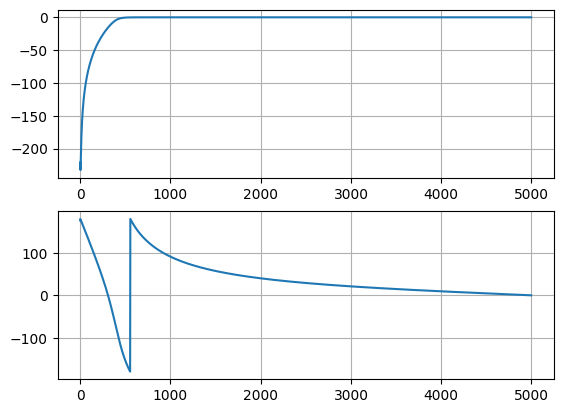

In [7]:
#passa-alta
N = math.log10((1/Rp**2 -1) / (1/Rs**2 -1)) / (2*math.log10(Wp1/Ws1))
N = int(np.sign(N)*np.ceil(abs(N)))

Wc = Wp1 * (1/(1/Rp**2 -1))**(1/(2*N))

N = abs(N)

k = np.arange(0,2*N)
poles = Wc*np.exp((1j*np.pi/(2*N))*(2*k+N-1))
print('All poles: ',poles)
stPoles = [p for p in poles if np.real(p)<0]
print('Stable poles: ',stPoles)

numS = np.append(1,np.zeros(N))
denS = np.poly(stPoles)
Hpas = ct.tf(numS,denS)
print('H(s):',Hpas)

Ts = 1/fs
Hz = ct.c2d(Hpas, Ts, 'tustin')
print('H(z):',Hz)

ct.bode(Hpas, dB=True, Hz=True)
ct.bode(Hz, dB=True, Hz=True)


numZ = Hz.num[0][0]
denZ = Hz.den[0][0]
w,h = freqz(numZ,denZ,worN=2000,fs=fs)
fig = plt.figure(3)
fig.clf()
ax0 = fig.add_subplot(211)
ax0.plot(w,20*np.log10(abs(h)))
ax0.grid(True)
ax1 = fig.add_subplot(212)
ax1.plot(w,np.angle(h)*180/np.pi)
ax1.grid(True)
plt.show()

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1087: ComplexWarning: Casting complex values to real discards the imaginary part
  den[j, :maxindex+1] = poly(poles[j])
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\control\xferfcn.py:1117: ComplexWarning: Casting complex values to real discards the imaginary part
  num[i, j, maxindex+1-len(numpoly):maxindex+1] = numpoly


0 states have been removed from the model

Passa-faixa:
Hpfs(s): <TransferFunction>: sys[21]
Inputs (1): ['u[0]']
Outputs (1): ['y[0]']


 s^15 + 2.047e+04 s^14 + 2.096e+08 s^13 + 1.4e+12 s^12 + 6.706e+15 s^11 + 2.384e+19 s^10 + 6.291e+22 s^9 + 1.19e+26 s^8 + 1.469e+29 s^7 + 1.814e+32 s^6 + 9.145e+35 s^5 + 4.611e+39 s^4 + 1.474e+43 s^3 + 3.141e+46 s^2 + 4.243e+49 s + 2.866e+52
---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
s^15 + 3.056e+04 s^14 + 4.668e+08 s^13 + 4.717e+12 s^12 + 3.515e+16 s^11 + 2.043e+20 s^10 + 9.542e+23 s^9 + 3.644e+27 s^8 + 1.146e+31 s^7 + 2.968e+34 s^6 + 6.278e+37 s^5 + 1.067e+41 s^4 + 1.412e+44 s^3 + 1.377e+47 s^2 + 8.885e+49 s + 2.866e+52



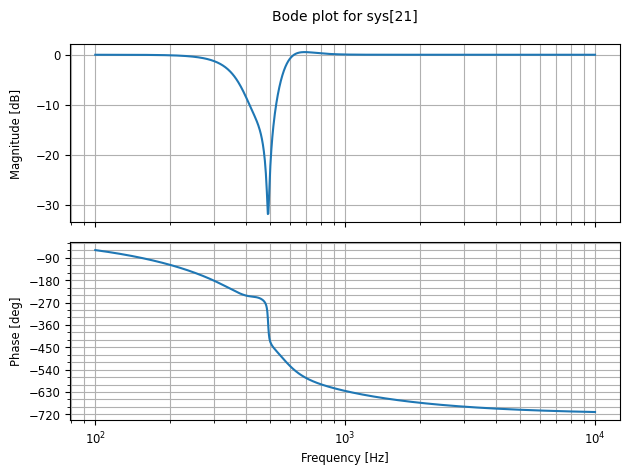

c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:461: LinAlgWarning: Ill-conditioned matrix (rcond=2.23358e-96): result may not be accurate.
  ad = linalg.solve(ima, np.eye(a.shape[0]) + (1.0-alpha)*dt*a)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:462: LinAlgWarning: Ill-conditioned matrix (rcond=2.23358e-96): result may not be accurate.
  bd = linalg.solve(ima, dt*b)
c:\Users\mateu\AppData\Local\Programs\Python\Python312\Lib\site-packages\scipy\signal\_lti_conversion.py:465: LinAlgWarning: Ill-conditioned matrix (rcond=2.21978e-96): result may not be accurate.
  cd = linalg.solve(ima.transpose(), c.transpose())


In [8]:
Hrfs = ct.minreal(Hpas + Hpbs)
print('\nPassa-faixa:')
print('Hpfs(s):', Hrfs)
plt.figure(3)
plt.clf()
ct.bode(Hrfs,dB=True,Hz=True)
plt.show()

Hz = ct.c2d(Hrfs, Ts, 'tustin')

numZ = Hz.num[0][0]
denZ = Hz.den[0][0]

# Exercício 5 #
Fazer uma função Python para implementar o filtro projetado. Esta função deve receber como argumento de entrada somente o sinal a ser filtrado e deve devolver somente o sinal filtrado e não deve conter comandos de construção do filtro. Aplicar esta função no sinal do exercício 1. Forneça o espectro do sinal filtrado que comprova o funcionamento da função de filtragem.

50.0 | 1.9975
300.0 | 0.8577
500.0 | 0.2335
700.0 | 1.5898


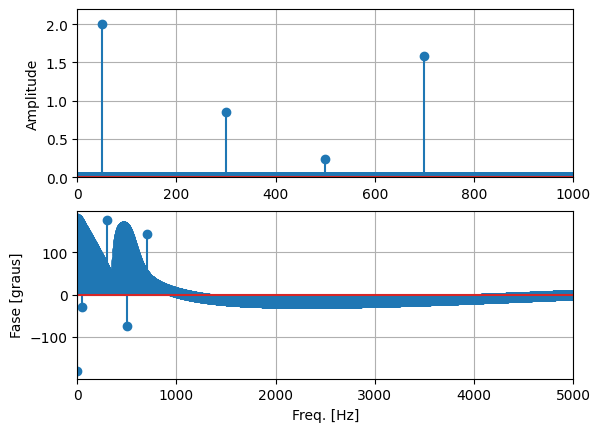

In [9]:
from scipy.signal import lfilter

filtered_signal = lfilter(numZ, denZ, sa)

espectro.espectro1D(filtered_signal, fs, 3)